# Mucking around with exponential curves...

We'll take a look at using a negative  our spore dispersal using an [natural] exponential curve, which [Galante et al.](http://www.tandfonline.com/doi/full/10.3852/10-388) found useful for describing spore concentrations from a mushroom. 

In [1]:
from sympy import symbols
from sympy.plotting import plot
from sympy import exp, ln

In [2]:
x  = symbols('x')

In [5]:
y  = symbols('y')

In [2]:
ln(3)

mpf('1.0986122886681098')

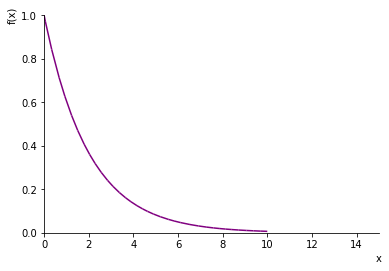

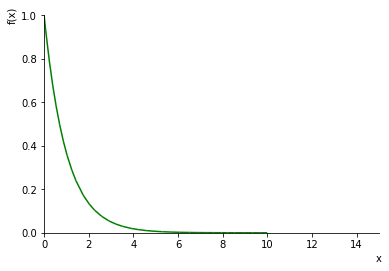

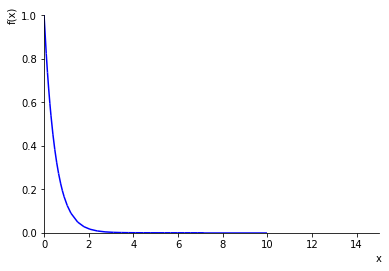

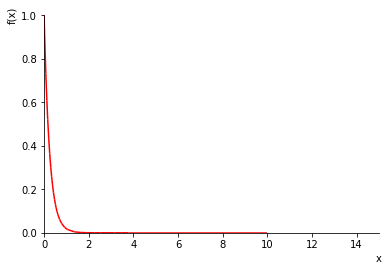

In [86]:
s = plot(exp(-0.5*x), line_color='Purple', ylim=(0,1), xlim=(0,15))

t = plot(exp(-x), line_color='Green', ylim=(0,1), xlim=(0,15))

u = plot(exp(-2*x), line_color='Blue', ylim=(0,1), xlim=(0,15))

v = plot(exp(-4*x), line_color='Red', ylim=(0,1), xlim=(0,15))

In [87]:
t.extend(s);t.extend(u);t.extend(v)

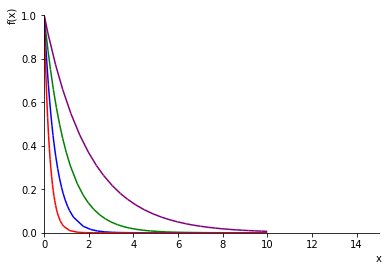

In [88]:
t.show()

Some very simple things to notice here. If we write this function with a dispersal ('D') coefficient, it looks like this: 

\begin{equation*}
f(x)   =  e^{-Dx}
\end{equation*}

When a fungus is well-dispersed (many small spores well ejected from a sporocarp), we give it a small value, and when the opposite is true, we'll give in a high value. In the above diagram, the purple fungus is well-dispersed, it has a small D value, D=0.5. The red fungus is poorly dispersed, D=4.  